### plot feature maps from images and kernels from models

In [1]:
import os
import random
import sys
import argparse
import datetime

import numpy as np
from PIL import Image
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = load_img('camas_tiles_test/Meio+Seca/Meio+Seca (1)_bottom_left.jpg', target_size=(150, 150))

In [3]:
def print_feature_maps(layer_names, feature_maps):
    for layer_names, feature_maps in zip(layer_names, feature_maps):
        print(feature_maps.shape)
        if len(feature_maps.shape) == 4:
            channels=feature_maps.shape[-1]
            size=feature_maps.shape[1]
            display_grid = np.zeros((size, size * channels))
            for i in range(channels):
                x=feature_maps[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i*size:(i+1)*size]=x
                
            scale = 20. / channels
            plt.figure(figsize=(scale*channels, scale))
            plt.title(layer_names)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [4]:
def build_model_a(input_shape, num_classes):
    
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
        model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
        
        return model

1/1 [==============================] - 35s 35s/step
(1, 150, 150, 32)


C:\Users\giova\AppData\Local\Temp\ipykernel_18656\515913513.py:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


(1, 75, 75, 32)
(1, 75, 75, 64)
(1, 75, 75, 64)
(1, 37, 37, 64)
(1, 37, 37, 128)
(1, 37, 37, 128)
(1, 18, 18, 128)
(1, 18, 18, 256)
(1, 18, 18, 256)
(1, 9, 9, 256)
(1, 9, 9, 512)
(1, 9, 9, 512)
(1, 4, 4, 512)
(1, 8192)
(1, 256)
(1, 4)


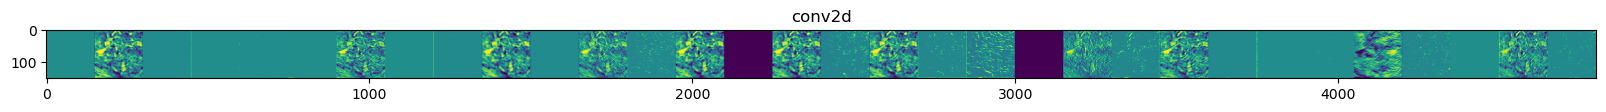

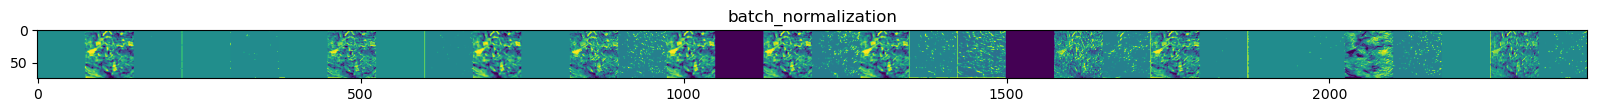

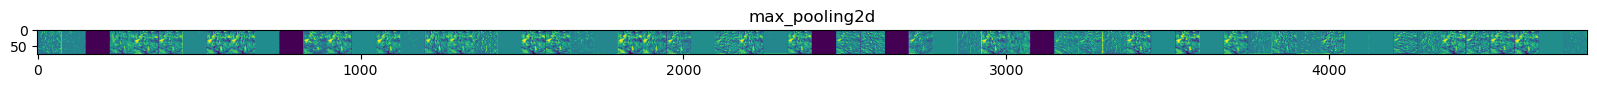

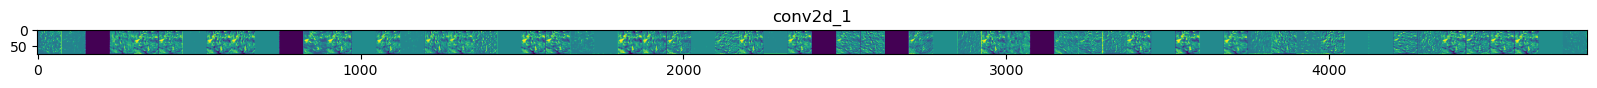

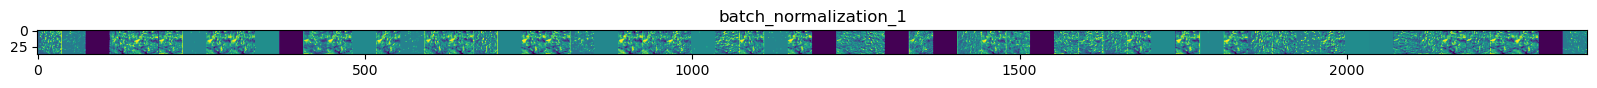

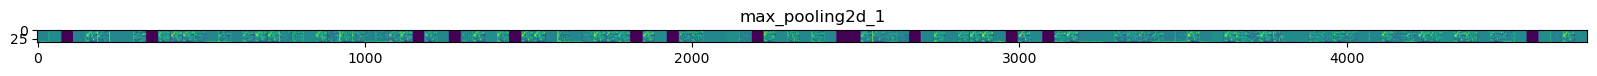

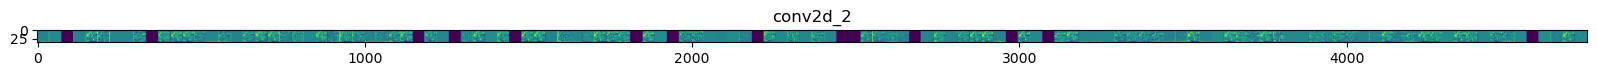

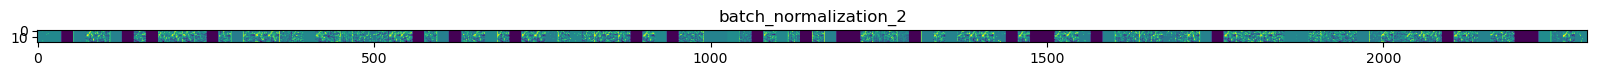

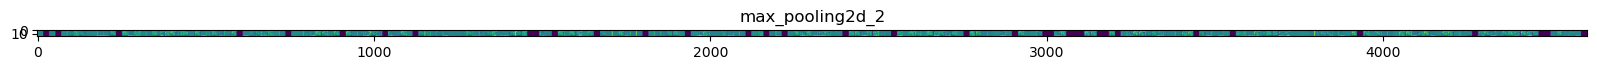

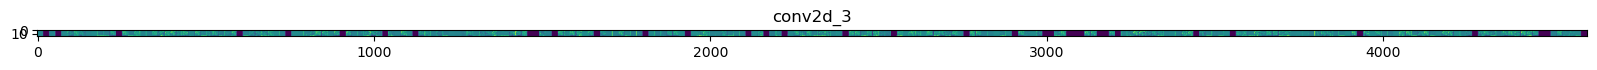

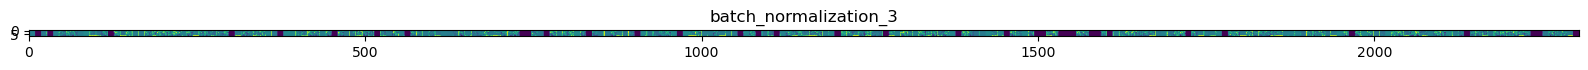

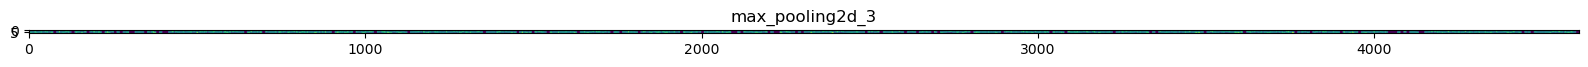

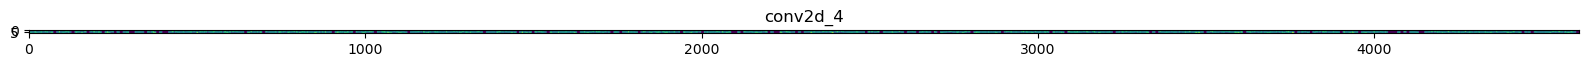

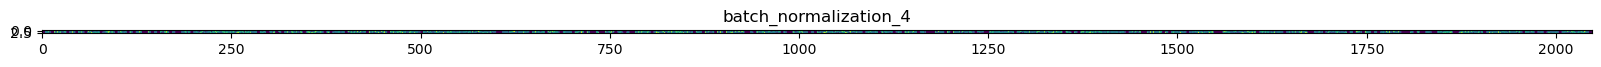

In [5]:
model = build_model_a((150, 150, 3), 4)
layer_ouputs = [layer.output for layer in model.layers[1:]]
visualize_model = Model(inputs=model.input, outputs=layer_ouputs)
x=img_to_array(img)
x=x.reshape((1, 150, 150, 3))
x=x/255
feature_maps=visualize_model.predict(x)
layer_names = [layer.name for layer in model.layers]

print_feature_maps(layer_names, feature_maps)

In [6]:
def build_model_b(input_shape, num_classes):
    
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), input_shape=input_shape, activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
        model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
        
        return model

1/1 [==============================] - 1s 547ms/step
(1, 75, 75, 128)
(1, 75, 75, 64)
(1, 37, 37, 64)
(1, 37, 37, 32)
(1, 18, 18, 32)
(1, 10368)
(1, 128)
(1, 4)


C:\Users\giova\AppData\Local\Temp\ipykernel_18656\515913513.py:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


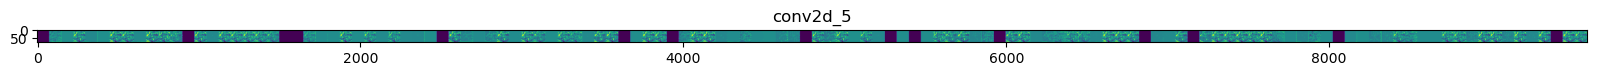

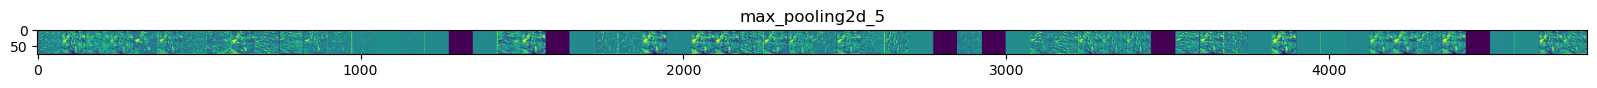

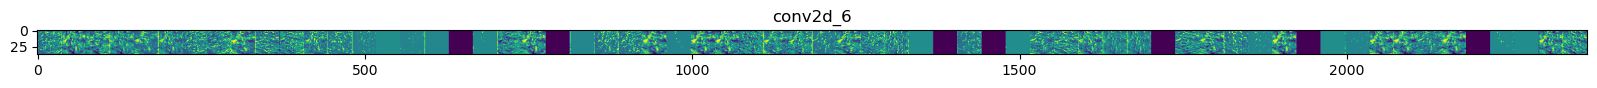

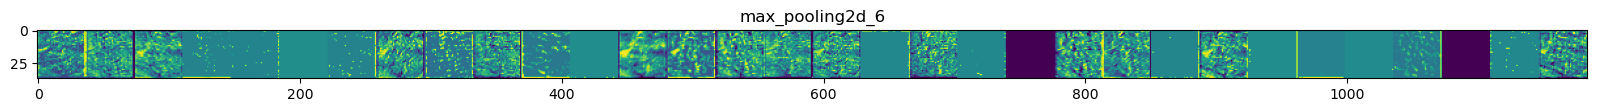

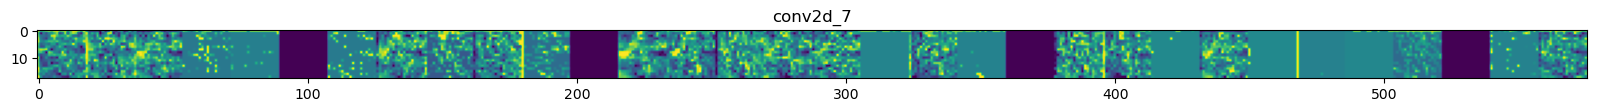

In [7]:
model = build_model_b((150, 150, 3), 4)
layer_ouputs = [layer.output for layer in model.layers[1:]]
visualize_model = Model(inputs=model.input, outputs=layer_ouputs)
x=img_to_array(img)
x=x.reshape((1, 150, 150, 3))
x=x/255
feature_maps=visualize_model.predict(x)
layer_names = [layer.name for layer in model.layers]

print_feature_maps(layer_names, feature_maps)

In [8]:

def build_model_c(input_shape, num_classes):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=input_shape, activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dropout(0.2))

        model.add(tf.keras.layers.Dense(num_classes))
        model.add(tf.keras.layers.Activation('softmax'))
                
        return model

1/1 [==============================] - 0s 425ms/step
(1, 150, 150, 16)
(1, 75, 75, 16)
(1, 75, 75, 32)
(1, 75, 75, 32)
(1, 37, 37, 32)
(1, 37, 37, 32)
(1, 37, 37, 32)
(1, 18, 18, 32)
(1, 18, 18, 32)
(1, 18, 18, 32)


C:\Users\giova\AppData\Local\Temp\ipykernel_18656\515913513.py:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


(1, 9, 9, 32)
(1, 9, 9, 32)
(1, 9, 9, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 2, 2, 32)
(1, 128)
(1, 128)
(1, 128)
(1, 128)
(1, 4)
(1, 4)


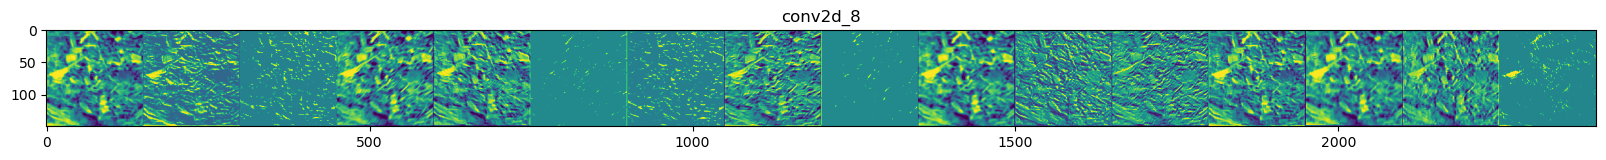

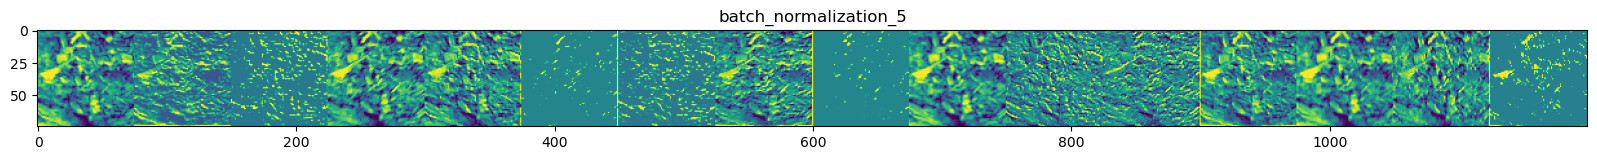

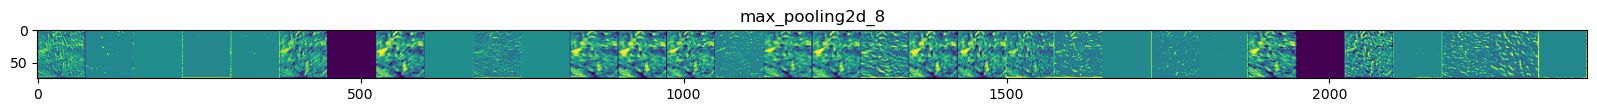

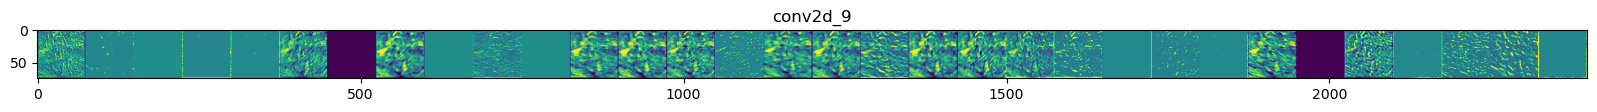

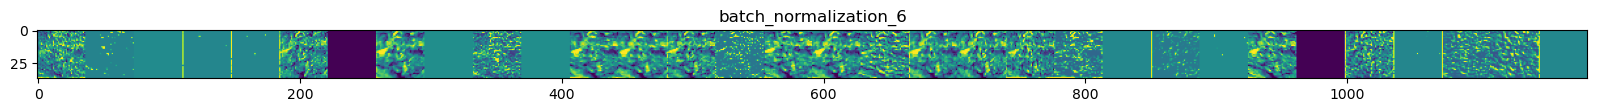

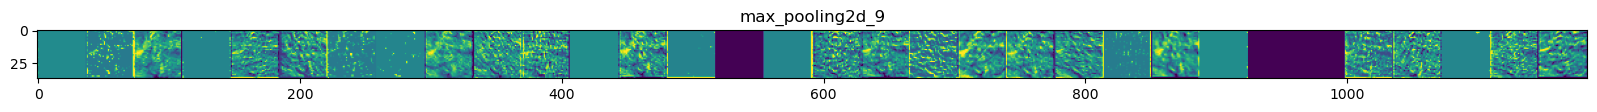

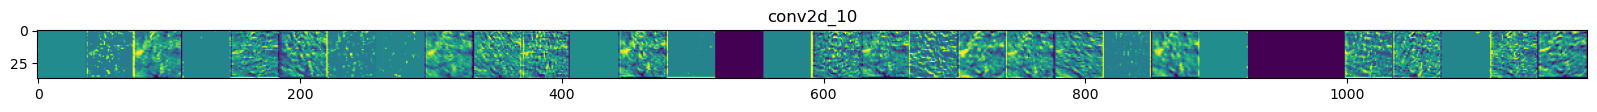

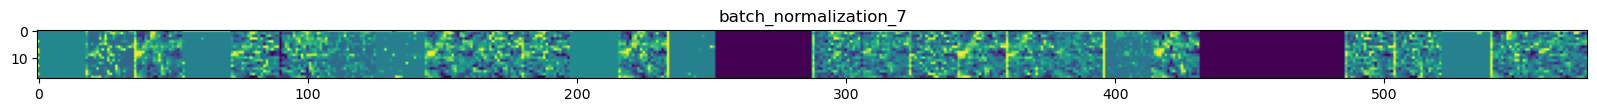

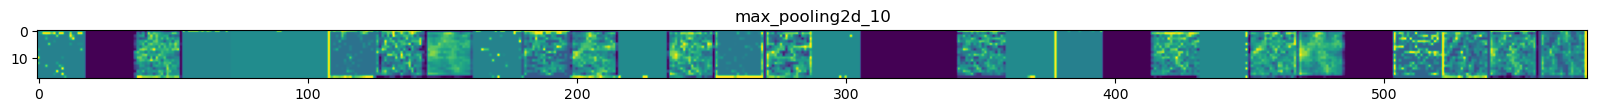

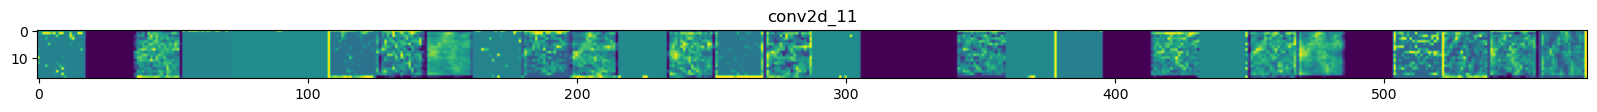

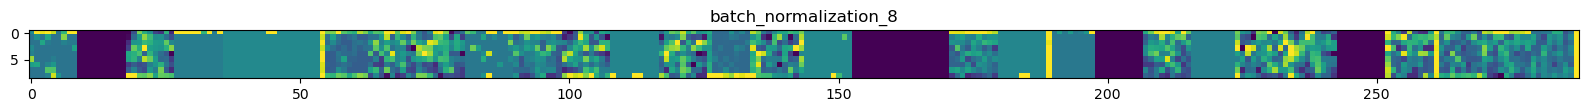

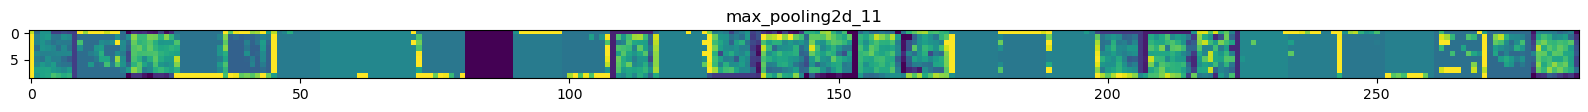

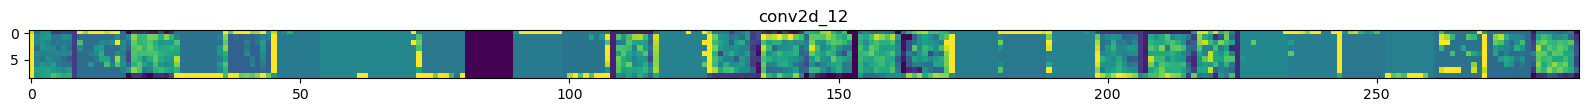

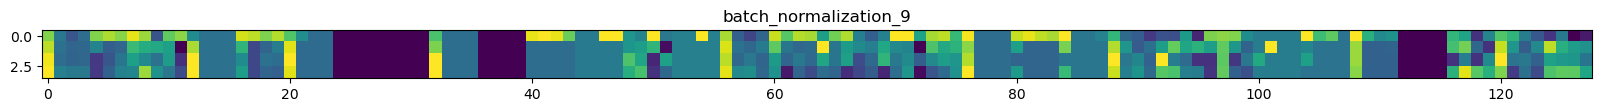

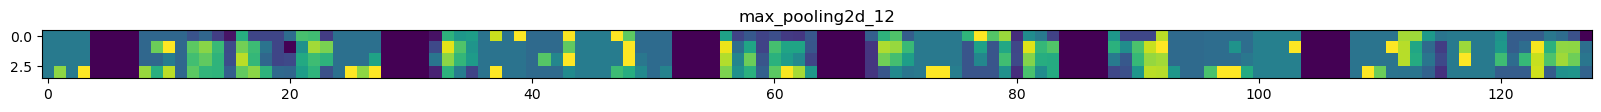

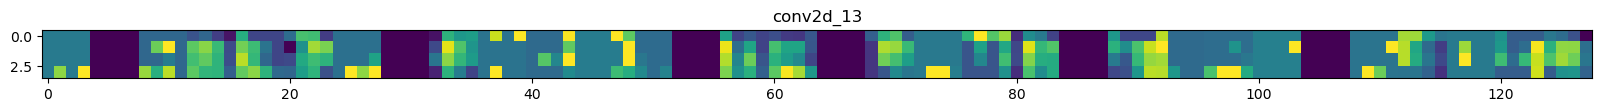

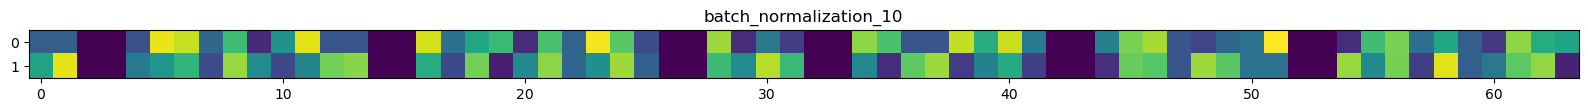

In [9]:
model = build_model_c((150, 150, 3), 4)
layer_ouputs = [layer.output for layer in model.layers[1:]]
visualize_model = Model(inputs=model.input, outputs=layer_ouputs)
x=img_to_array(img)
x=x.reshape((1, 150, 150, 3))
x=x/255
feature_maps=visualize_model.predict(x)
layer_names = [layer.name for layer in model.layers]

print_feature_maps(layer_names, feature_maps)

In [ ]:
import matplotlib.pyplot as plt

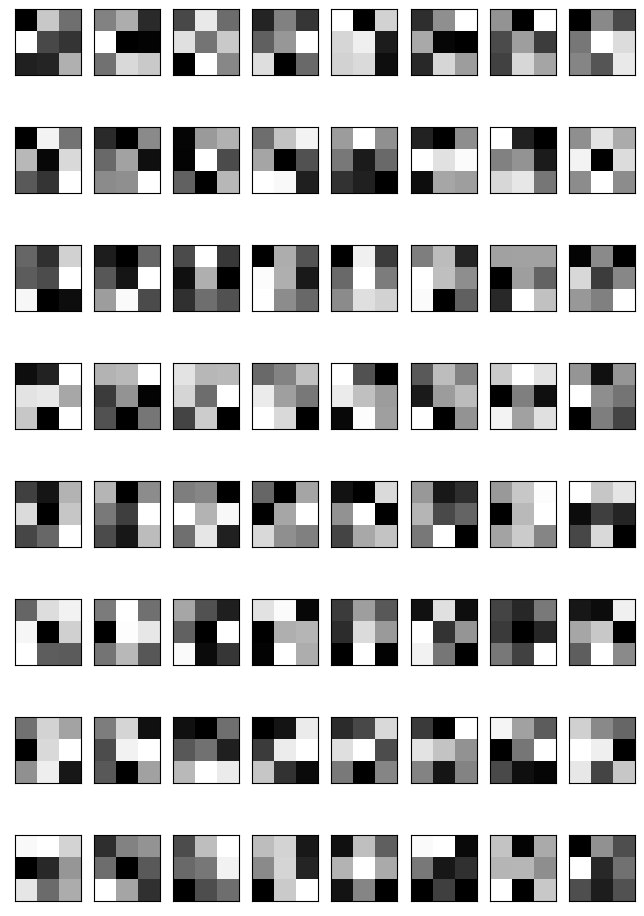

In [89]:
fig1=plt.figure(figsize=(8, 12))
columns=8
rows=8
n_filters=columns*rows
for i in range(1, n_filters+1):
    f=filters[:, :, :, i-1]
    fig1=plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
plt.show()